In [ ]:
#Nama: Dilara Kynta Putri
#NIM: 1103204059
#Kelas: TK44G4

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:

import pandas as pd

# Ganti 'nama_file.csv' dengan nama file dataset Anda
nama_file = '/content/gdrive/MyDrive/Mall_Customers.csv'

# Membaca dataset menjadi DataFrame
df = pd.read_csv(nama_file)

# Menampilkan beberapa baris pertama dari DataFrame
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Data
# Gantilah bagian ini dengan data Anda
X = df['Age'].values.reshape(-1, 1)
y = df['Annual Income (k$)'].values

# Menangani nilai NaN dengan menggantinya dengan nilai rata-rata
X = np.nan_to_num(X, nan=np.nanmean(X))
y = np.nan_to_num(y, nan=np.nanmean(y))

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inisialisasi model SVR dengan hyperparameter tertentu
svr_model = SVR(C=1000, gamma=0.05, kernel='rbf')

# Melatih model
svr_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = svr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 912.1465616328242


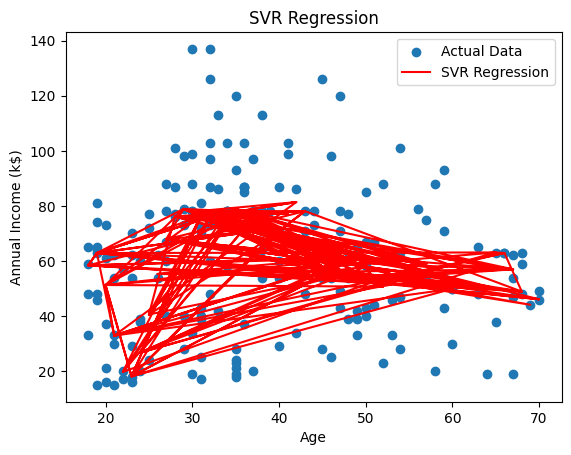

In [16]:
import matplotlib.pyplot as plt

# Visualisasi data dan model
plt.scatter(X, y, label='Actual Data')
plt.plot(X, svr_model.predict(X), color='red', label='SVR Regression')

# Label sumbu
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

# Menambahkan judul
plt.title('SVR Regression')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

# Tentukan hyperparameter yang akan diuji
param_grid = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(svr_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Gunakan model terbaik untuk membuat prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 781.7900469978471


In [18]:
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, gamma=0.005)

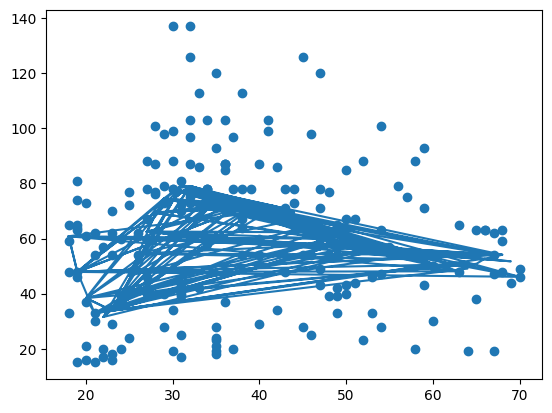

In [19]:
#visualisasikan model
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))